<a href="https://colab.research.google.com/github/vivek-kumar24/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data
import pandas as pd

# Attempt to read a smaller portion of the file
try:
    train_df = pd.read_csv("/content/train.csv", header=None, names=['Class Id', 'Title', 'Description'], nrows=112515)  # Read up to and including the problematic row
    print(train_df.iloc[112512])  # Print the row before the reported error
    print(train_df.iloc[112513])  # Print the problematic row
except pd.errors.ParserError as e:
    print(f"Error reading file: {e}")

test_df = pd.read_csv("/content/test.csv", header=None, names=['Class Id', 'Title', 'Description'])

# Combine title and description for simplicity
train_df['text'] = train_df['Title'] + " " + train_df['Description']
test_df['text'] = test_df['Title'] + " " + test_df['Description']

# Encode labels
label_encoder = LabelEncoder()
train_df['Class Id'] = label_encoder.fit_transform(train_df['Class Id'])
test_df['Class Id'] = label_encoder.transform(test_df['Class Id'])

all_labels = pd.concat([train_df['Class Id'], test_df['Class Id']])
label_encoder.fit(all_labels)

# Re-encode the labels
train_df['Class Id'] = label_encoder.transform(train_df['Class Id'])
test_df['Class Id'] = label_encoder.transform(test_df['Class Id'])



Class Id                                                       3
Title                   GE OKs \$15 Bln Buybacks, Hikes Dividend
Description     BOSTON (Reuters) - Diversified manufacturer G...
Name: 112512, dtype: object
Class Id                                                       3
Title                  Winn-Dixie Names Rival's Ex-Executive CEO
Description     NEW YORK (Reuters) - Winn-Dixie Stores Inc. &...
Name: 112513, dtype: object


In [17]:
# Prepare text data
max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'].values)

X_train = tokenizer.texts_to_sequences(train_df['text'].values)
X_test = tokenizer.texts_to_sequences(test_df['text'].values)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Subtract 1 from 'Class Id' to make it zero-indexed
y_train = tf.keras.utils.to_categorical(train_df['Class Id'] - 1, num_classes=4)
y_test = tf.keras.utils.to_categorical(test_df['Class Id'] - 1, num_classes=4)

In [18]:
# Build the model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1159s 819ms/step - accuracy: 0.7641 - loss: 0.6101 - val_accuracy: 0.8978 - val_loss: 0.3015
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1149s 817ms/step - accuracy: 0.9333 - loss: 0.2320 - val_accuracy: 0.8931 - val_loss: 0.3116
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1185s 833ms/step - accuracy: 0.9516 - loss: 0.1659 - val_accuracy: 0.8939 - val_loss: 0.3787
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1208s 824ms/step - accuracy: 0.9614 - loss: 0.1315 - val_accuracy: 0.8887 - val_loss: 0.3786
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1163s 824ms/step - accuracy: 0.9696 - loss: 0.0948 - val_accuracy: 0.8890 - val_loss: 0.4662


In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

238/238 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.9008 - loss: 0.4095
Test Loss: 0.40884625911712646
Test Accuracy: 0.9001446962356567


In [21]:
# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step


In [23]:
# Check the number of unique classes in y_true and compare it to label_encoder.classes_
print("Unique classes in y_true:", np.unique(y_true))
print("Label encoder classes:", label_encoder.classes_)

# If there's a mismatch, adjust either the label encoder or the model output to have the same number of classes.
# For example, if you're sure there are only 4 classes, you might need to refit your label encoder on the appropriate data.

Unique classes in y_true: [0 1 2 3]
Label encoder classes: [0 1 2 3 4]


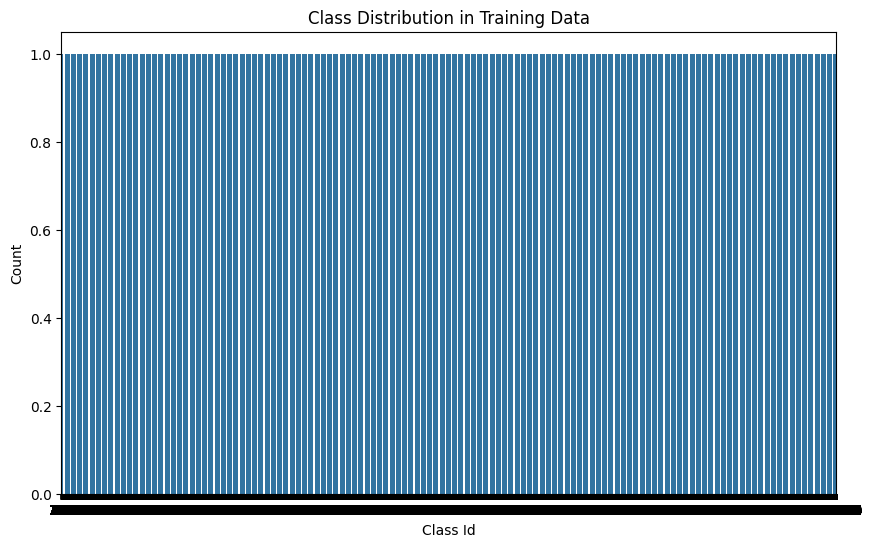

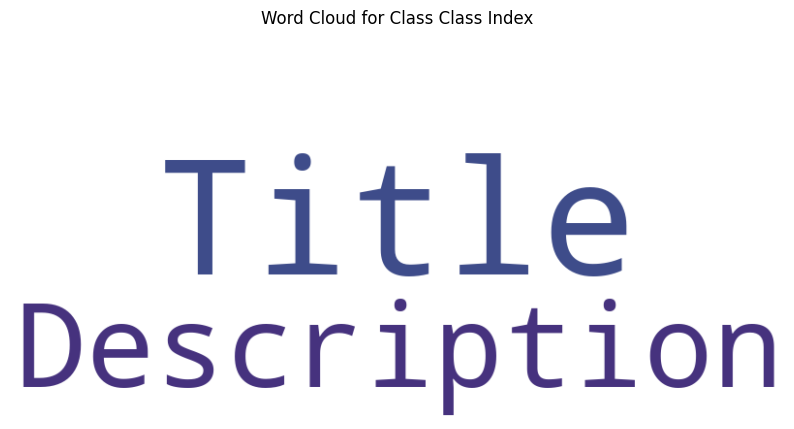

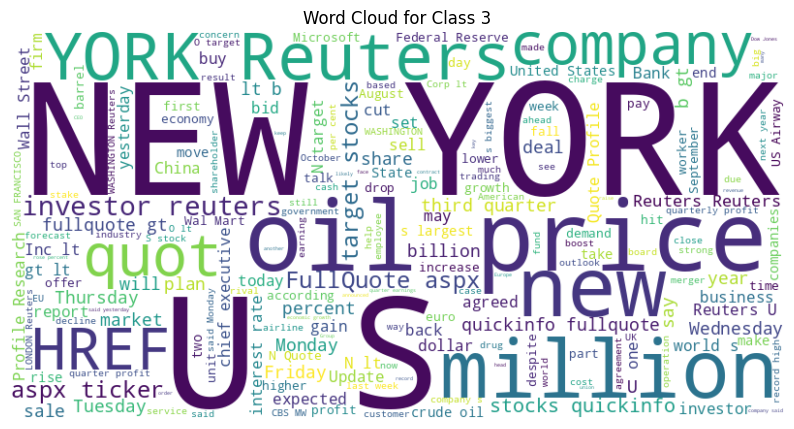

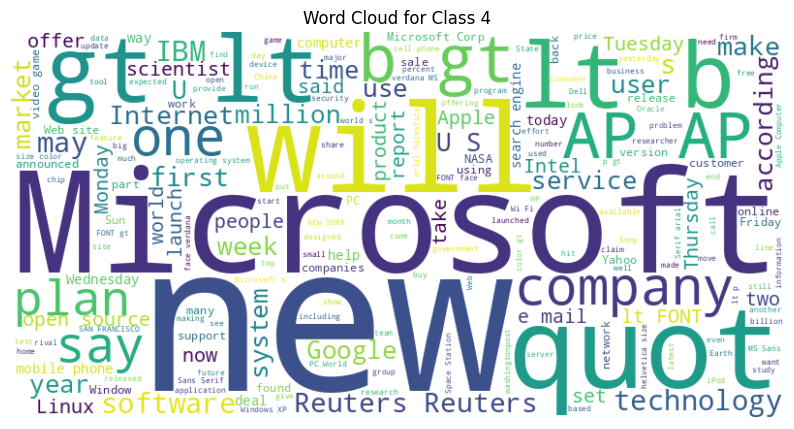

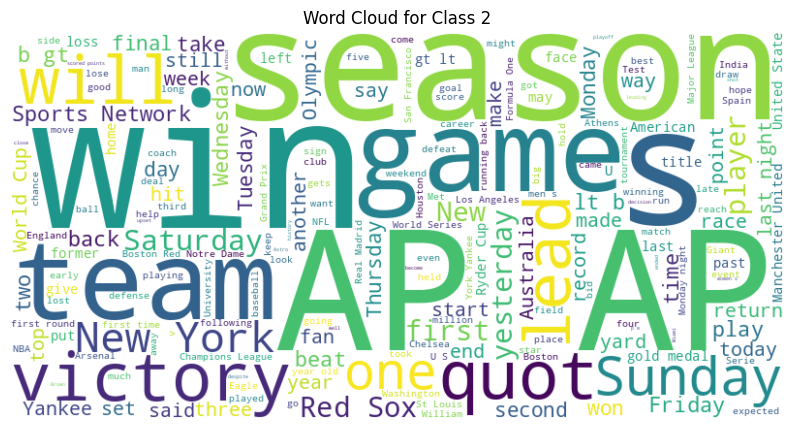

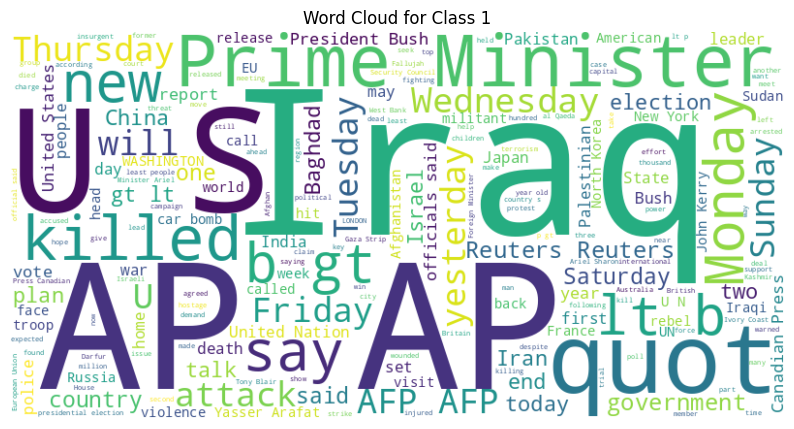

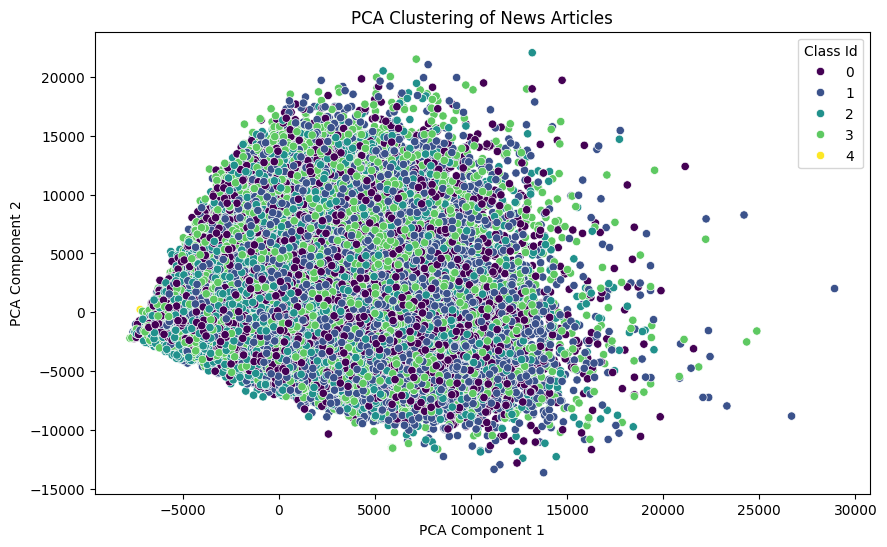

In [14]:


# Load the data
train_df = pd.read_csv('train.csv', header=None, names=['Class Id', 'Title', 'Description'])
test_df = pd.read_csv('test.csv', header=None, names=['Class Id', 'Title', 'Description'])

# Combine title and description for simplicity
train_df['text'] = train_df['Title'] + " " + train_df['Description']
test_df['text'] = test_df['Title'] + " " + test_df['Description']

# Encode labels
label_encoder = LabelEncoder()
train_df['Class Id'] = label_encoder.fit_transform(train_df['Class Id'])
test_df['Class Id'] = label_encoder.transform(test_df['Class Id'])



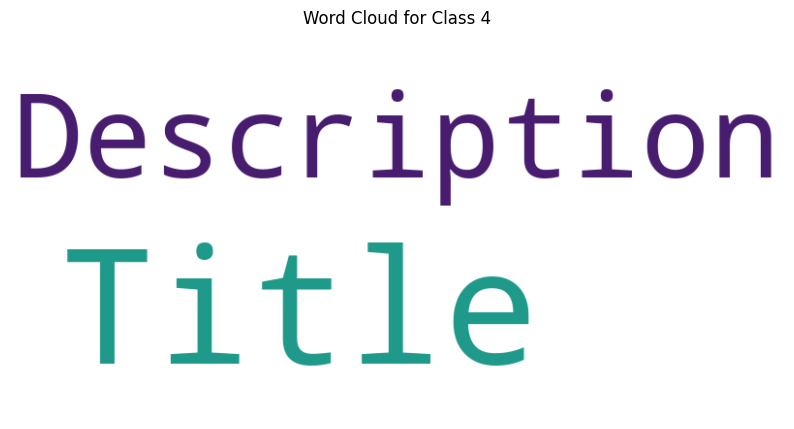

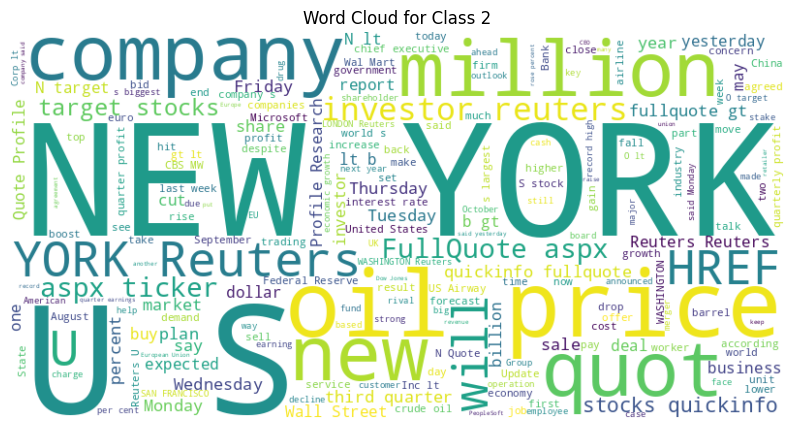

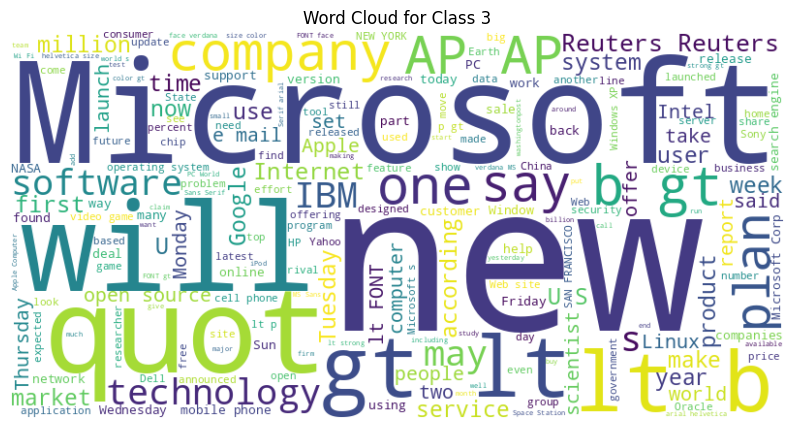

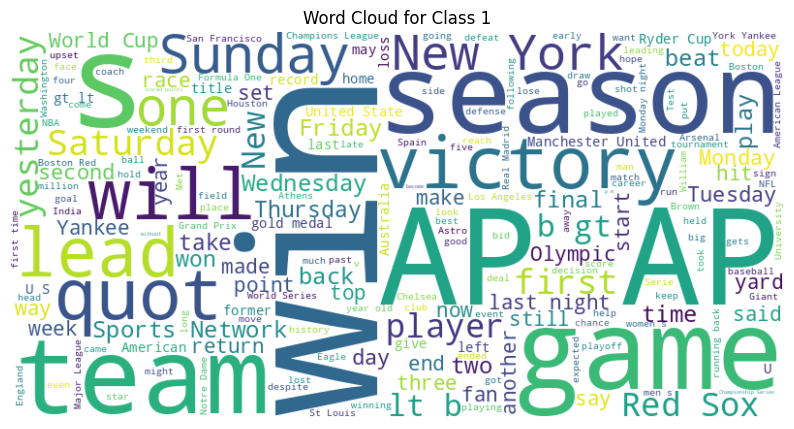

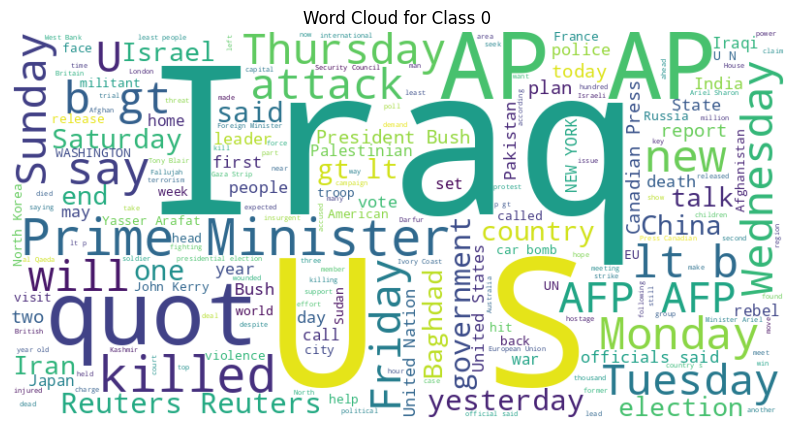

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Word cloud for each class
from wordcloud import WordCloud

for class_id in train_df['Class Id'].unique():
    plt.figure(figsize=(10, 6))
    text = " ".join(train_df[train_df['Class Id'] == class_id]['text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {label_encoder.inverse_transform([class_id])[0]}')
    plt.axis('off')
    plt.show()

# Tokenize and pad sequences for clustering visualization
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'].values)

X_train = tokenizer.texts_to_sequences(train_df['text'].values)
X_train = pad_sequences(X_train, maxlen=max_len)




In [25]:
# Function to predict class of a new article
def predict_article(model, tokenizer, text, max_len=200):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_len)
    prediction = model.predict(text_pad)
    predicted_class = np.argmax(prediction, axis=1)
    return label_encoder.inverse_transform(predicted_class)[0]




In [34]:
# Example article
new_article = "Apple unveils new iPhone with advanced features and improved battery life."

# Predict class
predicted_class = predict_article(model, tokenizer, new_article)
print(f"The predicted class for the article is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The predicted class for the article is: 2
